## 전체 처리 및 3세 분류

In [52]:
import numpy as np
import nltk
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Kkma
import re

##코드 최적화는 나중에 진행 예정

#데이터 프레임을 만들기 위한 최기화
ageList = ['3세', '4세', '5세 여자', '5세 남자', '6세 여자', '6세 남자', '7세 여자', '7세 남자']
minMorphList = []
avgMorphList = []
maxMorphList = []



df = pd.read_excel('C:/Users/user/Desktop/nlp/newData.xlsx')
print(df.describe())
print(df.info())
# print(df)
#나이와 문장만 추출한 데이터 프레임
data = df.loc[:,['STT', 'AGE']]
print(data)

#각 나이별 문장 추출
thirdData = df[df.AGE == 3] #전체 데이터에서 세살인 데이터만 추출.
thirdData = thirdData['STT'] #3살 데이터 중에서 문장만 남겨놓기
print("3살 데이터")
print(thirdData)

okt = Okt()
kkma = Kkma()
thirdMorphs=[]      #문장의 형태소를 담은 변수
thirdNouns=[]       #문장의 명사를 담은 변수
thirdNounsCount=[]     #문장내, 명사의 갯수를 담은 변수
thirdMorphsCount=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0
minNounsCnt=10
maxNounsCnt=0
nTotal=0

#형태소 평균, 최장, 최단 길이 추출
#낱말 평균, 최장, 최단 길이 추출

##3살 분류##
print(len(thirdData))
for i in range(len(thirdData)):
    thirdData[i] = re.sub(r"[():a-zA-Z]", "", thirdData[i])  #노이즈 제거
    m = okt.morphs(thirdData[i])  # m에 한 문장 내의 형태소 출력
    thirdNouns = okt.nouns(thirdData[i])  # 한 문장 내의 단어
    print("단어의 수")
    print(thirdNouns)
    thirdNounsCount.append(len(thirdNouns)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    thirdMorphs.append(m)  # 한 문장의 형태소를 담음
    thirdMorphsCount.append(len(m)) # 한 문장의 형태소의 갯수를 담음

thirdMCount = pd.DataFrame(thirdMorphsCount) #형태소의 갯수를 데이터프레임으로 변환
thirdNCount = pd.DataFrame(thirdNounsCount)  #명사의 갯수를 데이터프레임으로 변환



print("품사 묶음:",thirdMorphs) # 문장 내에 있는 형태소 출력
print("품사의 수:", thirdMorphsCount) #문장내에 형태소 갯수들의 리스트를 출력
# 최대, 최소, 평균 형태소, 낱말 길이 출력
for j in range(len(thirdMorphsCount)) :
    # 형태소
    if maxMorphCnt < thirdMorphsCount[j]:
        maxMorphCnt = thirdMorphsCount[j]
    if minMorphCnt > thirdMorphsCount[j]:
        minMorphCnt = thirdMorphsCount[j]
    total = total + thirdMorphsCount[j]

    # 낱말
    if maxNounsCnt < thirdNounsCount[j]:
        maxNounsCnt = thirdNounsCount[j]
    if minNounsCnt > thirdNounsCount[j]:
        minNounsCnt = thirdNounsCount[j]
    total = total + thirdNounsCount[j]
avg = total/len(thirdNounsCount)

print("3살 평균 형태소 길이 : ", avg)
print("3살 최대 형태소 길이:", maxMorphCnt)
print("3살 최소 형태소 길이:", minMorphCnt)
print("단어의 수");
print(thirdNCount);
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)


                  ID          AGE
count    1752.000000  1752.000000
mean   282638.992580     5.375000
std     72666.483494     1.317333
min     92324.000000     3.000000
25%    215629.750000     4.750000
50%    285633.000000     5.500000
75%    353371.500000     6.250000
max    360171.000000     7.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1752 non-null   int64 
 1   STT     1752 non-null   object
 2   AGE     1752 non-null   int64 
 3   GENDER  1752 non-null   object
 4   THEMA   1752 non-null   object
dtypes: int64(2), object(3)
memory usage: 68.6+ KB
None
                                      STT  AGE
0                     광장에 비둘기들이 많아요 (SN:)    3
1                         엄마와 광장으로 놀러나왔어요    3
2                                  씽씽 달려요    3
3                                  코를 풀어요    3
4                                   종류대로     

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


단어의 수
['잠옷']
단어의 수
['동전']
단어의 수
['영화']
단어의 수
['모자']
단어의 수
['침대', '정리']
단어의 수
['송이']
단어의 수
['그림', '완성']
단어의 수
['향기']
단어의 수
['아기', '인형']
단어의 수
['그네']
단어의 수
['머리']
단어의 수
['구실']
단어의 수
[]
단어의 수
['장난감', '정리']
단어의 수
['인형', '놀이', '해']
단어의 수
['바닥']
단어의 수
['장난감', '구경해']
단어의 수
['미끄럼틀']
단어의 수
['텐트']
단어의 수
['인형']
단어의 수
['신발', '신어']
단어의 수
['누가', '누가', '더', '요']
단어의 수
['달리', '달리기', '시합', '해']
단어의 수
['엄마', '칭찬']
단어의 수
['노래']
단어의 수
['오렌지', '주스']
단어의 수
['몸']
단어의 수
['책']
단어의 수
['바다']
품사 묶음: [['광장', '에', '비둘기', '들', '이', '많아요'], ['엄마', '와', '광장', '으로', '놀러', '나왔어요'], ['씽씽', '달려요'], ['코', '를', '풀어요'], ['종류', '대로'], ['모빌', '과', '놀아요'], ['씨앗', '을', '심어요'], ['티비', '를', '봐요'], ['제', '를', '넣어요'], ['코', '가', '간지러워요'], ['비누', '를', '묻혀요'], ['주말', '이에요'], ['난', '컴퓨터', '로', '해', '요'], ['파란', '불', '이에요'], ['할아버지', '도', '계세', '요'], ['트리', '를', '꾸며요'], ['동생', '은', '문제', '를', '풀어요'], ['빨간', '불', '이에요'], ['얼른', '일어나요'], ['차', '들', '이', '멈춰요'], ['스키', '를', '타요'], ['상쾌해요'], ['빵', '을', '만들어요'], ['반죽', '을', '만들어'], ['이사', '를

## 4세 분류

In [35]:
i = j = 0
fourthMorphs=[]      #문장의 형태소를 담은 변수
fourthNouns=[]       #문장의 명사를 담은 변수
fourthNounsCount=[]
fourthMorphsCount=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


fourthData = df[df.AGE == 4]
fourthData = fourthData['STT']
print(fourthData[219+i])


for i in range(len(fourthData)):
    fourthData[i] = re.sub(r"[():a-zA-Z]", "", fourthData[219+i])
    m = okt.morphs(fourthData[219+i])
    m = okt.morphs(fourthData[219+i])
    fourthNouns = okt.nouns(fourthData[219+i])  # 한 문장 내의 단어
    fourthNounsCount.append(len(fourthNouns)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    print("4세 단어:", fourthNouns)
    print(len(fourthNouns))


    fourthMorphs.append(m)
    fourthMorphsCount.append(len(m))

fourthMCount = pd.DataFrame(fourthMorphsCount)
fourthNCount = pd.DataFrame(fourthNounsCount)



for j in range(len(fourthMorphsCount)) :
    if maxMorphCnt < fourthMorphsCount[j]:
        maxMorphCnt = fourthMorphsCount[j]
    if minMorphCnt > fourthMorphsCount[j]:
        minMorphCnt = fourthMorphsCount[j]
    total = total + fourthMorphsCount[j]
avg = total/len(fourthMorphsCount)
print(total)
print(len(fourthMorphsCount))
print("4살 평균 형태소 길이 : ", avg)
print("4살 최대 형태소 길이:", maxMorphCnt)
print("4살 최소 형태소 길이:", minMorphCnt)
print("4살 단어 수")
print(fourthNCount)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

print(data)

엄마랑 같이 양치해요
4세 단어: ['엄마', '양치']
2
4세 단어: ['물감']
1
4세 단어: ['케이크']
1
4세 단어: ['공원']
1
4세 단어: ['안고']
1
4세 단어: ['소', '가족']
2
4세 단어: ['박자']
1
4세 단어: ['기침']
1
4세 단어: ['얼룩', '소']
2
4세 단어: ['장보기']
1
4세 단어: ['목']
1
4세 단어: ['그림']
1
4세 단어: ['크레파스', '도']
2
4세 단어: ['아기', '아빠']
2
4세 단어: ['책']
1
4세 단어: ['아기', '배']
2
4세 단어: ['동생']
1
4세 단어: ['머리']
1
4세 단어: ['색연필', '도']
2
4세 단어: ['양치질', '해']
2
4세 단어: ['그림', '숙제']
2
4세 단어: ['꽃', '그릴', '거']
3
4세 단어: ['몰래', '책']
2
4세 단어: ['입', '해']
2
4세 단어: ['강아지']
1
4세 단어: ['꽃', '향기']
2
4세 단어: ['빗자루']
1
4세 단어: ['초록색', '제일']
2
4세 단어: ['촛불', '불', '거']
3
4세 단어: ['양말', '짝']
2
4세 단어: ['검은색']
1
4세 단어: ['미술', '시간']
2
4세 단어: ['이불', '속']
2
4세 단어: ['오빠', '더']
2
4세 단어: ['조개', '껍데기']
2
4세 단어: ['거울']
1
4세 단어: ['밤하늘']
1
4세 단어: ['청소', '해']
2
4세 단어: ['사범']
1
4세 단어: ['만들기', '시간']
2
4세 단어: ['채소', '고기', '사']
3
4세 단어: ['참치', '우유']
2
4세 단어: ['별', '모양']
2
4세 단어: ['그림']
1
4세 단어: ['미술', '시간']
2
4세 단어: ['발차기', '해']
2
4세 단어: ['엄마', '장']
2
4세 단어: ['쓰레기']
1
4세 단어: ['무지개', '구름']
2
4세 단어: ['날씨']
1
4세 단

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

4세 단어: ['달', '모양']
2
4세 단어: ['엄마', '소', '젖']
3
4세 단어: ['빨래', '해']
2
4세 단어: ['치약', '냄새']
2
4세 단어: ['무엇', '발견']
2
4세 단어: ['공원', '산책']
2
4세 단어: ['우리', '강아지']
2
4세 단어: ['엄마', '과자']
2
4세 단어: ['비눗방울']
1
4세 단어: ['야구', '장갑']
2
4세 단어: ['운동화', '신어']
2
4세 단어: ['귀']
1
4세 단어: ['상추']
1
4세 단어: ['그릇']
1
4세 단어: ['아기']
1
4세 단어: ['거품', '해']
2
4세 단어: ['민들레', '노란색']
2
4세 단어: ['게']
1
4세 단어: ['사과']
1
4세 단어: ['민들레', '불어']
2
4세 단어: ['소리']
1
4세 단어: ['헬멧']
1
4세 단어: ['사과']
1
4세 단어: ['아빠', '드릴', '거']
3
4세 단어: ['것']
1
4세 단어: ['쿠키']
1
4세 단어: ['엄마', '젖']
2
4세 단어: ['눈', '꼭']
2
4세 단어: ['공원', '꽃']
2
4세 단어: ['모니터']
1
4세 단어: ['기도']
1
4세 단어: ['비눗방울']
1
4세 단어: ['귀가']
1
4세 단어: ['둘', '미소', '어요']
3
4세 단어: []
0
4세 단어: ['동생']
1
4세 단어: ['머리']
1
4세 단어: ['보라색', '꽃']
2
4세 단어: ['민들레']
1
4세 단어: ['엄마', '사과']
2
4세 단어: ['피망']
1
4세 단어: ['목욕', '중이']
2
4세 단어: ['사과', '색']
2
4세 단어: ['사이']
1
4세 단어: ['공원']
1
4세 단어: ['컵케이크', '거']
2
4세 단어: ['아빠']
1
4세 단어: ['과자']
1
4세 단어: ['비눗방울']
1
4세 단어: ['비눗방울', '불어']
2
4세 단어: ['꼭']
1
4세 단어: ['여름']
1
4세 단어: ['토

## 5세 여자 분류

In [39]:
i = j = 0
fifthMorphsG=[]      #문장의 형태소를 담은 변수
fifthNounsG=[]       #문장의 명사를 담은 변수
fifthGNounsCount=[]
fifthMorphsCountG=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


fifthDataG = df[(df['AGE'] == 5) & (df['GENDER'] == "여")]
print(fifthDataG)
fifthDataG = fifthDataG['STT']
print(fifthDataG)


for i in range(len(fifthDataG)):
    fifthDataG[i] = re.sub(r"[():a-zA-Z]", "", fifthDataG[438+i])
    m = okt.morphs(fifthDataG[438+i])
    m = okt.morphs(fifthDataG[438+i])
    fifthNounsG = okt.nouns(fifthDataG[438+i])  # 한 문장 내의 단어
    fifthGNounsCount.append(len(fifthNounsG)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    print("5세 여자 단어:", fifthNounsG)
    print(len(fifthNounsG))
    fifthMorphsG.append(m)
    fifthMorphsCountG.append(len(m))

fifthGMCount = pd.DataFrame(fifthMorphsCountG)
fifthGNCount = pd.DataFrame(fifthGNounsCount)

for j in range(len(fifthMorphsCountG)) :
    if maxMorphCnt < fifthMorphsCountG[j]:
        maxMorphCnt = fifthMorphsCountG[j]
    if minMorphCnt > fifthMorphsCountG[j]:
        minMorphCnt = fifthMorphsCountG[j]
    total = total + fifthMorphsCountG[j]
avg = total/len(fifthMorphsCountG)
print("5살 여자 평균 형태소 길이 : ", avg)
print("5살 여자 최대 형태소 길이:", maxMorphCnt)
print("5살 여자 최소 형태소 길이:", minMorphCnt)
print(fifthGNCount)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)


         ID              STT  AGE GENDER THEMA
438  191752    동물원에 고릴라가 있어요    5      여   고릴라
439  191755        옥수수 삶아주세요    5      여   옥수수
440  191756          난 새가 좋아    5      여   앵무새
441  191757     빨간 소화기를 가져와요    5      여    화재
442  191758      공룡이 사납게 생겼어    5      여    공룡
..      ...              ...  ...    ...   ...
652  199117   레오는 얼룩무늬 고양이예요    5      여   고양이
653  199118     달리다 이마를 다쳤어요    5      여   타박상
654  199119  노란색 빨간색 찰흙이 있어요    5      여    찰흙
655  199120          여행을 떠나요    5      여   비행기
656  199122           웃음이 나요    5      여  베개싸움

[219 rows x 5 columns]
438      동물원에 고릴라가 있어요
439          옥수수 삶아주세요
440            난 새가 좋아
441       빨간 소화기를 가져와요
442        공룡이 사납게 생겼어
            ...       
652     레오는 얼룩무늬 고양이예요
653       달리다 이마를 다쳤어요
654    노란색 빨간색 찰흙이 있어요
655            여행을 떠나요
656             웃음이 나요
Name: STT, Length: 219, dtype: object
5세 여자 단어: ['동물원', '고릴라']
2
5세 여자 단어: ['옥수수']
1
5세 여자 단어: ['난', '새']
2
5세 여자 단어: ['소화기']
1
5세 여자 단어: ['공룡']
1
5세 여자 단어: ['

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs

5세 여자 단어: ['아빠']
1
5세 여자 단어: ['아빠', '번쩍']
2
5세 여자 단어: ['치과']
1
5세 여자 단어: ['친구', '숙제', '해']
3
5세 여자 단어: ['여행', '가요']
2
5세 여자 단어: ['산타', '모자']
2
5세 여자 단어: ['연극', '거']
2
5세 여자 단어: ['기차표']
1
5세 여자 단어: ['아빠', '회사']
2
5세 여자 단어: ['발레', '연습', '해']
3
5세 여자 단어: ['아빠', '회사', '가야', '해']
4
5세 여자 단어: ['기차', '타요']
2
5세 여자 단어: ['아빠', '책']
2
5세 여자 단어: ['발레', '신발', '신어']
3
5세 여자 단어: ['곧', '출근']
2
5세 여자 단어: ['아빠', '일찍']
2
5세 여자 단어: ['칫솔', '치약']
2
5세 여자 단어: ['아빠', '어제']
2
5세 여자 단어: ['고양이']
1
5세 여자 단어: ['동화책']
1
5세 여자 단어: []
0
5세 여자 단어: ['아빠', '저녁', '거']
3
5세 여자 단어: ['크리스마스', '트리']
2
5세 여자 단어: []
0
5세 여자 단어: ['표', '장', '사']
3
5세 여자 단어: []
0
5세 여자 단어: ['회사', '준비', '해']
3
5세 여자 단어: ['친구', '실수']
2
5세 여자 단어: ['이']
1
5세 여자 단어: ['아빠']
1
5세 여자 단어: []
0
5세 여자 단어: ['아빠', '글자', '연습', '해']
4
5세 여자 단어: ['사무실', '일']
2
5세 여자 단어: ['발레복']
1
5세 여자 단어: ['꽃', '모양']
2
5세 여자 단어: ['새', '밀짚모자']
2
5세 여자 단어: ['풀', '발라']
2
5세 여자 단어: ['온', '집안', '레일']
3
5세 여자 단어: ['친구', '집']
2
5세 여자 단어: ['엄마', '혼']
2
5세 여자 단어: ['몸', '텅', '비어']
3
5세 

## 5세 남자 분류

In [40]:
i = j = 0
fifthMorphsB=[]      #문장의 형태소를 담은 변수
fifthNounsB=[]       #문장의 명사를 담은 변수
fifthBNounsCount=[]
fifthMorphsCountB=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


fifthDataB = df[(df["AGE"] == 5) & (df["GENDER"] == "남")]
fifthDataB = fifthDataB['STT']
print(fifthDataB)


for i in range(len(fifthDataB)):
    fifthDataB[i] = re.sub(r"[()a-zA-Z]", "", fifthDataB[657 + i])
    m = okt.morphs(fifthDataB[657+i])
    m = okt.morphs(fifthDataB[657+i])
    fifthNounsB = okt.nouns(fifthDataB[657+i])  # 한 문장 내의 단어
    fifthBNounsCount.append(len(fifthNounsB)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    print("5세 남자 단어:", fifthNounsB)
    print(len(fifthNounsB))
    fifthMorphsB.append(m)
    fifthMorphsCountB.append(len(m))

fifthMMCout = pd.DataFrame(fifthMorphsCountB)
fifthBNCount = pd.DataFrame(fifthBNounsCount)

for j in range(len(fifthMorphsCountB)) :
    if maxMorphCnt < fifthMorphsCountB[j]:
        maxMorphCnt = fifthMorphsCountB[j]
    if minMorphCnt > fifthMorphsCountB[j]:
        minMorphCnt = fifthMorphsCountB[j]
    total = total + fifthMorphsCountB[j]
avg = total/len(fifthMorphsCountB)
print("5살 남자 평균 형태소 길이 : ", avg)
print("5살 남자 최대 형태소 길이:", maxMorphCnt)
print("5살 남자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)
print(fifthBNCount)

657       청소를 안해서 거미줄이 있네요
658           병아리가 알에서 깼어요
659    어제 아빠가 케이크를 갖고 오셨어요
660       도둑이 안을 들여다 보고 있네
661       건강하면 뭐든지 할 수 있어요
              ...         
871             코가 막혀서 답답해
872          거미는 다리가 여덟개예요
873             하마는 덩치가 커요
874          거미는 동굴에서도 살아요
875       난 혼자서 단추 잠글 수 있어
Name: STT, Length: 219, dtype: object
5세 남자 단어: ['청소', '안해', '거미줄']
3
5세 남자 단어: ['병아리', '알']
2
5세 남자 단어: ['어제', '아빠', '케이크']
3
5세 남자 단어: ['도둑', '안', '보고']
3
5세 남자 단어: ['뭐', '수']
2
5세 남자 단어: ['상어', '바다']
2
5세 남자 단어: ['콜라']
1
5세 남자 단어: ['채소']
1
5세 남자 단어: ['친구', '미끄럼틀']
2
5세 남자 단어: ['머리']
1
5세 남자 단어: ['곰', '인형', '서로']
3
5세 남자 단어: ['귤', '개']
2
5세 남자 단어: ['어제', '아빠', '도너츠']
3
5세 남자 단어: ['놀이', '공원', '사촌']
3
5세 남자 단어: ['놀이', '공원', '탈', '것']
4
5세 남자 단어: ['도너츠', '친구']
2
5세 남자 단어: []
0
5세 남자 단어: ['독', '뱀']
2
5세 남자 단어: ['다음', '회전목마']
2
5세 남자 단어: ['청소']
1
5세 남자 단어: ['코끼리', '덩', '치가']
3
5세 남자 단어: ['기분']
1
5세 남자 단어: ['카트', '하나', '가득', '음식']
4
5세 남자 단어: ['사자', '쥐', '옛날', '이야기']
4
5세 남자 단어: ['주먹', '불끈']
2
5세 남

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

5세 남자 단어: ['하마', '무리']
2
5세 남자 단어: ['토마토', '두', '개']
3
5세 남자 단어: ['아빠', '비빔밥']
2
5세 남자 단어: ['물고기', '밥']
2
5세 남자 단어: ['다람쥐', '나무', '구멍', '도토리']
4
5세 남자 단어: ['로션', '얼굴']
2
5세 남자 단어: ['비빔밥', '채소']
2
5세 남자 단어: ['창문', '해']
2
5세 남자 단어: ['엄마', '도']
2
5세 남자 단어: ['난', '도너츠']
2
5세 남자 단어: ['후라이드', '치킨']
2
5세 남자 단어: ['손', '꼭', '쥐']
3
5세 남자 단어: ['과자']
1
5세 남자 단어: ['라이언', '킹', '적']
3
5세 남자 단어: ['할머니', '호랑이', '담배', '시절', '이야기']
5
5세 남자 단어: ['동물원', '사자', '앞', '사진']
4
5세 남자 단어: ['단추', '해']
2
5세 남자 단어: ['당근']
1
5세 남자 단어: ['할로윈']
1
5세 남자 단어: ['난']
1
5세 남자 단어: ['체온계', '열', '재고']
3
5세 남자 단어: ['무거워', '못']
2
5세 남자 단어: ['병원', '약']
2
5세 남자 단어: ['장난감', '비행기']
2
5세 남자 단어: ['아기']
1
5세 남자 단어: ['난', '여름', '제일']
3
5세 남자 단어: ['과자', '것']
2
5세 남자 단어: ['아인']
1
5세 남자 단어: ['옷']
1
5세 남자 단어: ['곰', '인형']
2
5세 남자 단어: ['비빔밥']
1
5세 남자 단어: ['형', '안']
2
5세 남자 단어: ['하마', '물', '속']
3
5세 남자 단어: []
0
5세 남자 단어: ['냉장고', '음식']
2
5세 남자 단어: ['말']
1
5세 남자 단어: ['하마', '땅', '위', '풀']
4
5세 남자 단어: ['아가', '우']
2
5세 남자 단어: ['아빠', '야단', '울']
3
5세 

## 6세 여자 분류

In [41]:
i = j = 0
sixthMorphsG=[]      #문장의 형태소를 담은 변수
sixthNounsG=[]       #문장의 명사를 담은 변수
sixthGNounsCount=[]
sixthMorphsCountG=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


sixthDataG = df[(df["AGE"] == 6) & (df["GENDER"] == "여")]
print(sixthDataG)
sixthDataG = sixthDataG['STT']
print(sixthDataG)


for i in range(len(sixthDataG)):
    sixthDataG[i] = re.sub(r"[()a-zA-Z]", "", sixthDataG[1095 + i])
    m = okt.morphs(sixthDataG[1095+i])
    m = okt.morphs(sixthDataG[1095+i])
    sixthNounsG = okt.nouns(sixthDataG[1095+i])  # 한 문장 내의 단어
    sixthGNounsCount.append(len(sixthNounsG)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    print("단어:",okt.nouns(sixthDataG[1095+i]))
    sixthMorphsG.append(m)
    sixthMorphsCountG.append(len(m))
    print("6세 여자 단어:", sixthNounsG)
    print(len(sixthNounsG))

sixthGMCount = pd.DataFrame(sixthMorphsCountG)
sixthGNCount = pd.DataFrame(sixthGNounsCount)

for j in range(len(sixthMorphsCountG)) :
    if maxMorphCnt < sixthMorphsCountG[j]:
        maxMorphCnt = sixthMorphsCountG[j]
    if minMorphCnt > sixthMorphsCountG[j]:
        minMorphCnt = sixthMorphsCountG[j]
    total = total + sixthMorphsCountG[j]
avg = total/len(sixthMorphsCountG)
print("6살 여자 평균 형태소 길이 : ", avg)
print("6살 여자 최대 형태소 길이:", maxMorphCnt)
print("6살 여자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)
print(sixthGNCount)

          ID                  STT  AGE GENDER    THEMA
1095  218302            맞기 정말 싫은데    6      여       주사
1096  218303     (SP:사)탕이 딸기 맛이에요    6      여       사탕
1097  218304             아파서 괴로워요    6      여    소녀 체온
1098  218305  동물원에서 사자 앞에서 사진을 찍어    6      여       사자
1099  218306           코가 막혀서 답답해    6      여        코
...      ...                  ...  ...    ...      ...
1309  218516        좋아하는 바나나도 샀어요    6      여       카트
1310  218517         아기가 케이크를 먹어요    6      여     케잌먹기
1311  218518         운동화가 너무 더러워요    6      여  더러운 운동화
1312  218519     도둑이 검은 옷을 입고 있어요    6      여       도둑
1313  218520              몸살이 났어요    6      여    차 마시기

[219 rows x 5 columns]
1095              맞기 정말 싫은데
1096       (SP:사)탕이 딸기 맛이에요
1097               아파서 괴로워요
1098    동물원에서 사자 앞에서 사진을 찍어
1099             코가 막혀서 답답해
               ...         
1309          좋아하는 바나나도 샀어요
1310           아기가 케이크를 먹어요
1311           운동화가 너무 더러워요
1312       도둑이 검은 옷을 입고 있어요
1313                몸살이 났어요
Name: ST

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs

단어: ['다음', '회전목마']
6세 여자 단어: ['다음', '회전목마']
2
단어: ['친구', '감기']
6세 여자 단어: ['친구', '감기']
2
단어: ['도그', '콜라']
6세 여자 단어: ['도그', '콜라']
2
단어: ['채']
6세 여자 단어: ['채']
1
단어: ['귤']
6세 여자 단어: ['귤']
1
단어: ['놀이', '공원', '탈', '것']
6세 여자 단어: ['놀이', '공원', '탈', '것']
4
단어: ['꾹꾹', '참고', '주사']
6세 여자 단어: ['꾹꾹', '참고', '주사']
3
단어: ['스파게티', '포크']
6세 여자 단어: ['스파게티', '포크']
2
단어: ['돼지', '새끼']
6세 여자 단어: ['돼지', '새끼']
2
단어: ['뱀', '몸']
6세 여자 단어: ['뱀', '몸']
2
단어: []
6세 여자 단어: []
0
단어: ['치료']
6세 여자 단어: ['치료']
1
단어: ['상어', '바다']
6세 여자 단어: ['상어', '바다']
2
단어: ['핼러윈', '신나요']
6세 여자 단어: ['핼러윈', '신나요']
2
단어: ['힘', '수']
6세 여자 단어: ['힘', '수']
2
단어: ['학교', '못']
6세 여자 단어: ['학교', '못']
2
단어: ['밀크']
6세 여자 단어: ['밀크']
1
단어: ['거북이']
6세 여자 단어: ['거북이']
1
단어: ['표정']
6세 여자 단어: ['표정']
1
단어: ['람쥐', '공원']
6세 여자 단어: ['람쥐', '공원']
2
단어: ['리', '가족', '치킨']
6세 여자 단어: ['리', '가족', '치킨']
3
단어: ['닭', '농장']
6세 여자 단어: ['닭', '농장']
2
단어: ['케이크']
6세 여자 단어: ['케이크']
1
단어: []
6세 여자 단어: []
0
단어: ['운동']
6세 여자 단어: ['운동']
1
단어: ['체온계', '열', '재고']
6세 여자 단어: ['체온계', '열'

## 6세 남자 분류

In [49]:
i = j = 0
sixthMorphsB=[]      #문장의 형태소를 담은 변수
sixthNounsB=[]       #문장의 명사를 담은 변수
sixthBNounsCount=[]
sixthMorphsCountB=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


sixthDataB = df[(df["AGE"] == 6) & (df["GENDER"]=="남")]
print(sixthDataB)
sixthDataB = sixthDataB['STT']
print(sixthDataB)


for i in range(len(sixthDataB)):
    sixthDataB[i] = re.sub(r"[()a-zA-Z]", "", sixthDataB[876 + i])
    m = okt.morphs(sixthDataB[876+i])
    m = okt.morphs(sixthDataB[876+i])
    m = okt.morphs(sixthDataB[876+i])
    sixthNounsB = okt.nouns(sixthDataB[876+i])  # 한 문장 내의 단어
    sixthBNounsCount.append(len(sixthNounsB)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    print("6세 남자 단어:", sixthNounsB)
    print(len(sixthNounsB))
    sixthMorphsB.append(m)
    sixthMorphsCountB.append(len(m))

sixthMMCount = pd.DataFrame(sixthMorphsCountB)
sixthMNCount = pd.DataFrame(sixthBNounsCount)

for j in range(len(sixthMorphsCountB)) :
    if maxMorphCnt < sixthMorphsCountB[j]:
        maxMorphCnt = sixthMorphsCountB[j]
    if minMorphCnt > sixthMorphsCountB[j]:
        minMorphCnt = sixthMorphsCountB[j]
    total = total + sixthMorphsCountB[j]
avg = total/len(sixthMorphsCountB)
print("6살 남자 평균 형태소 길이 : ", avg)
print("6살 남자 최대 형태소 길이:", maxMorphCnt)
print("6살 남자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)
print(sixthMNCount)

          ID                        STT  AGE GENDER       THEMA
876   353123              노란색 티셔츠를 입었어요    6      남     장난감 비행기
877   353124                아기가 너무 슬픈가봐    6      남       우는 아기
878   353125  (SP:써)(NO:비가)비가 오니까 우산을 써    6      남          우산
879   353126                지금 화가 많이 났네    6      남  입 삐죽 내민 아이
880   353127           (NO:)커피를 따르고 있어요    6      남          커피
...      ...                        ...  ...    ...         ...
1090  353337                어깨동무를 하고있어요    6      남        외양묘사
1091  353338                추워서 장갑을 꼈어요    6      남        외양묘사
1092  353339                 엄마가 나를 찾아요    6      남        숨바꼭질
1093  353340            노란색 티셔츠를 입고 있어요    6      남        외양묘사
1094  353341              손으로 케이크를 먹었어요    6      남        케잌먹기

[219 rows x 5 columns]
876                 노란색 티셔츠를 입었어요
877                   아기가 너무 슬픈가봐
878     (SP:써)(NO:비가)비가 오니까 우산을 써
879                   지금 화가 많이 났네
880              (NO:)커피를 따르고 있어요
                  ...            
1090

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs

6세 남자 단어: ['분홍색', '치마']
2
6세 남자 단어: ['겨울']
1
6세 남자 단어: ['아인', '타']
2
6세 남자 단어: ['수지', '목걸이', '걸']
3
6세 남자 단어: ['엄마']
1
6세 남자 단어: []
0
6세 남자 단어: ['내', '바나나']
2
6세 남자 단어: ['손']
1
6세 남자 단어: ['마음대로', '안', '심통']
3
6세 남자 단어: ['커피', '색']
2
6세 남자 단어: ['콧물']
1
6세 남자 단어: ['부끄럼', '타']
2
6세 남자 단어: ['유리', '금']
2
6세 남자 단어: ['머리']
1
6세 남자 단어: ['엄지', '척']
2
6세 남자 단어: ['어머', '어쩌면']
2
6세 남자 단어: ['요', '기침']
2
6세 남자 단어: ['화가']
1
6세 남자 단어: ['보청기', '해']
2
6세 남자 단어: ['숨바꼭질', '때', '숨기']
3
6세 남자 단어: []
0
6세 남자 단어: ['잔디밭']
1
6세 남자 단어: []
0
6세 남자 단어: ['냄비', '김']
2
6세 남자 단어: ['길']
1
6세 남자 단어: ['진흙', '손']
2
6세 남자 단어: ['눈썹']
1
6세 남자 단어: ['카트', '하나', '가득', '음식']
4
6세 남자 단어: ['옷']
1
6세 남자 단어: ['운동화', '끈']
2
6세 남자 단어: ['커피', '향', '해']
3
6세 남자 단어: ['해', '운동화', '해']
3
6세 남자 단어: ['아빠', '키']
2
6세 남자 단어: ['가방', '안', '지퍼']
3
6세 남자 단어: []
0
6세 남자 단어: ['말']
1
6세 남자 단어: ['분홍색']
1
6세 남자 단어: ['병아리', '알']
2
6세 남자 단어: ['내', '동생', '아주']
3
6세 남자 단어: ['이', '강아지', '두', '살이']
4
6세 남자 단어: ['유리']
1
6세 남자 단어: ['네', '아저씨']
2
6세 남자 단어: ['꽃'

## 7세 여자 분류

In [50]:
i = j = 0
seventhMorphsG=[]      #문장의 형태소를 담은 변수
seventhNounsG=[]       #문장의 명사를 담은 변수
seventhGNounsCount=[]
seventhMorphsCountG=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


seventhDataG = df[(df["AGE"] == 7) & (df["GENDER"] == "여")]
print(seventhDataG)
seventhDataG = seventhDataG['STT']
print(seventhDataG)


for i in range(len(seventhDataG)):
    seventhDataG[i] = re.sub(r"[()a-zA-Z]", "", seventhDataG[1314 + i])
    m = okt.morphs(seventhDataG[1314+i])
    m = okt.morphs(seventhDataG[1314+i])
    seventhNounsG = okt.nouns(seventhDataG[1314+i])  # 한 문장 내의 단어
    seventhGNounsCount.append(len(seventhNounsG)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    print("7세 여자 단어:", seventhNounsG)
    print(len(seventhNounsG))
    seventhMorphsG.append(m)
    seventhMorphsCountG.append(len(m))

seventhGMCount = pd.DataFrame(seventhMorphsCountG)
seventhGNCount = pd.DataFrame(seventhGNounsCount)

for j in range(len(seventhMorphsCountG)) :
    if maxMorphCnt < seventhMorphsCountG[j]:
        maxMorphCnt = seventhMorphsCountG[j]
    if minMorphCnt > seventhMorphsCountG[j]:
        minMorphCnt = seventhMorphsCountG[j]
    total = total + seventhMorphsCountG[j]
avg = total/len(seventhMorphsCountG)
print("7살 여자 평균 형태소 길이 : ", avg)
print("7살 여자 최대 형태소 길이:", maxMorphCnt)
print("7살 여자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)
print(seventhGNCount)

          ID                            STT  AGE GENDER       THEMA
1314  217997                     나랑 할리갈리 할래    7      여       보드 게임
1315  217998         나 오늘 바이올린 선생님 오시는 날이야     7      여          하교
1316  217999                  우리 엄마는 선생님이야     7      여  가족에 대해 말하기
1317  218000          우리 오늘 노는 거 엄마 허락 받았어     7      여          하교
1318  218001                너 숙제 다했어 게임해도 돼    7      여          가정
...      ...                            ...  ...    ...         ...
1528  218722                  진달래꽃이 활짝 피었어     7      여          시각
1529  218723             어디서 피자 냄새가 나는 거 같아    7      여          후각
1530  218724                    김치가 너무 매워요     7      여  아침 식사를 할 때
1531  218725  선생님이 나가시자 애들이 또 시끄럽게 떠들기 시작했어    7      여          청각
1532  218726     자박자박 누군가에서 (SP:) 발소리가 들려요     7      여          청각

[219 rows x 5 columns]
1314                       나랑 할리갈리 할래
1315           나 오늘 바이올린 선생님 오시는 날이야 
1316                    우리 엄마는 선생님이야 
1317            우리 오늘 노는 거 엄마 허락 받았어 
1318    

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs

7세 여자 단어: ['생각', '해도', '그때']
3
7세 여자 단어: ['레몬', '신맛']
2
7세 여자 단어: ['이건', '꿀', '끈', '맛']
4
7세 여자 단어: ['꽃', '언제']
2
7세 여자 단어: ['어제', '미장원', '파마']
3
7세 여자 단어: ['오토바이']
1
7세 여자 단어: ['안']
1
7세 여자 단어: ['귓속말', '말']
2
7세 여자 단어: ['때', '때']
2
7세 여자 단어: ['나', '아빠', '손', '발']
4
7세 여자 단어: ['호박']
1
7세 여자 단어: ['내', '잘못', '거', '애']
4
7세 여자 단어: ['누가', '발바닥', '지면']
3
7세 여자 단어: ['지수', '자고', '쟤', '잠꾸러기']
4
7세 여자 단어: ['나뭇잎', '소리']
2
7세 여자 단어: ['왜', '나', '만']
3
7세 여자 단어: ['아빠', '또', '담배', '냄새', '나']
5
7세 여자 단어: ['오늘', '국', '좀']
3
7세 여자 단어: ['노을']
1
7세 여자 단어: ['여러', '가지', '맛', '나', '사탕']
5
7세 여자 단어: ['코로나', '때문']
2
7세 여자 단어: ['엄마', '아빠']
2
7세 여자 단어: ['예전', '이제']
2
7세 여자 단어: ['콤달콤', '냄새', '나']
3
7세 여자 단어: ['노랑나비', '날']
2
7세 여자 단어: ['창', '뭐']
2
7세 여자 단어: ['민들레', '솜털']
2
7세 여자 단어: ['멀리', '강']
2
7세 여자 단어: ['제', '침대', '폭', '폭', '할머니', '침대']
6
7세 여자 단어: ['새싹', '연한', '초록빛']
3
7세 여자 단어: ['컵라면', '수가']
2
7세 여자 단어: ['제', '방', '의자', '좀', '엉덩이']
5
7세 여자 단어: ['누가', '휘파람', '부']
3
7세 여자 단어: ['주방', '찌개']
2
7세 여자 단어: ['거울', '

## 7세 남자 분류

In [48]:
i = j = 0
seventhMorphsB=[]      #문장의 형태소를 담은 변수
seventhNounsB=[]       #문장의 명사를 담은 변수
seventhBNounsCount=[]
seventhMorphsCountB=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


seventhDataB = df[(df["AGE"] == 7) & (df["GENDER"] == "남")]
print(seventhDataB)
seventhDataB = seventhDataB['STT']
print(seventhDataB)


for i in range(len(seventhDataB)):
    seventhDataB[i] = re.sub(r"[()a-zA-Z]", "", seventhDataB[1533 + i])
    m = okt.morphs(seventhDataB[1533+i])
    m = okt.morphs(seventhDataB[1533+i])
    seventhNounsB = okt.nouns(seventhDataB[1533+i])  # 한 문장 내의 단어
    print("7세 남자 단어:", seventhNounsB)
    print(len(seventhNounsB))
    seventhBNounsCount.append(len(seventhNounsB)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    seventhMorphsB.append(m)
    seventhMorphsCountB.append(len(m))

seventhMMCount = pd.DataFrame(seventhMorphsCountB)
seventhMNCount = pd.DataFrame(seventhBNounsCount)

for j in range(len(seventhMorphsCountB)) :
    if maxMorphCnt < seventhMorphsCountB[j]:
        maxMorphCnt = seventhMorphsCountB[j]
    if minMorphCnt > seventhMorphsCountB[j]:
        minMorphCnt = seventhMorphsCountB[j]
    total = total + seventhMorphsCountB[j]
avg = total/len(seventhMorphsCountB)
print("7살 남자 평균 형태소 길이 : ", avg)
print("7살 남자 최대 형태소 길이:", maxMorphCnt)
print("7살 남자 최소 형태소 길이:", minMorphCnt)
print(seventhMNCount)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)
print(seventhMNCount)

          ID                                  STT  AGE GENDER          THEMA
1533  353463         키 큰 나무들이 일렬로 (SP:서 )쭉 서 있어요     7      남             시각
1534  353464                    새싹은 연한 초록색 빛이에요      7      남             시각
1535  353465           (NO:)차들이 너무 빵빵거려서 시끄러워 죽겠어    7      남             청각
1536  353466                 소리 못 들었어 분명히 여기서 났는데    7      남             청각
1537  353467          아침에 보니까 베란다의 국화꽃이 활짝 피었더라      7      남             시각
...      ...                                  ...  ...    ...            ...
1747  353677  (NO:)(NO:엄마는) 제 노랫소리가 (SP:좋)듣기 좋에요     7      남             청각
1748  353678                 겨울왕국 투도 나왔는데 투도 재미있어    7      남           겨울왕국
1749  353679                           화장실 가고 싶어요    7      남            차 안
1750  353680                      친구가 자꾸 짜증나게 해요     7      남  기분이나 감정 표현하기 
1751  353681                       윗집에서 자꾸 쿵쾅거려요     7      남             청각

[219 rows x 5 columns]
1533           키 큰 나무들이 일렬로 (SP:서 )쭉 서 있어요 
1534    

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs

7세 남자 단어: ['길고양이']
1
7세 남자 단어: ['일기', '독후감', '방학', '숙제']
4
7세 남자 단어: ['체험학습', '보고', '해']
3
7세 남자 단어: ['우리', '기와집', '민박', '집', '하룻밤']
5
7세 남자 단어: ['겨울', '전', '독감', '예방', '주사', '병원']
6
7세 남자 단어: ['너', '끝말잇기', '안', '단어', '말']
5
7세 남자 단어: []
0
7세 남자 단어: ['밥', '안', '그냥', '안']
4
7세 남자 단어: ['카시트']
1
7세 남자 단어: ['학교', '구구단', '우리', '구구단', '하자']
5
7세 남자 단어: ['방학', '지아', '언니네', '가도']
4
7세 남자 단어: ['왜', '너', '거', '거']
4
7세 남자 단어: ['너', '아이돌', '누구', '누구']
4
7세 남자 단어: ['너', '망가뜨렸다', '엄마', '거']
4
7세 남자 단어: ['나', '꿈', '잠', '소리', '질', '엄마']
6
7세 남자 단어: ['책', '동안', '여우', '때', '때', '마다', '박수']
7
7세 남자 단어: ['그', '사진', '저', '동생', '사진']
5
7세 남자 단어: ['방학', '때', '책', '독후감', '해']
5
7세 남자 단어: ['너', '놀이터', '옷', '거']
4
7세 남자 단어: ['아빠', '지금', '당장', '옷', '말']
5
7세 남자 단어: ['그', '전', '은행', '돈', '해', '얼마']
6
7세 남자 단어: ['제', '가장', '책', '윔피', '키스', '요']
6
7세 남자 단어: ['기억', '안', '나']
3
7세 남자 단어: ['혹시', '휘파람', '불', '줄', '알']
5
7세 남자 단어: ['졸졸', '시냇물', '소리', '듣기']
4
7세 남자 단어: ['우주', '여', '정류장', '도착', '이십만원', '아무', '데', '수']
8


## DATA FRAME 만들기

In [115]:
print(ageList)
print(avgMorphList)
print(maxMorphList)
print(minMorphList)

analDf = pd.DataFrame((zip(ageList, avgMorphList, maxMorphList, minMorphList)), columns = ["나이", "평균 형태소의 길이", "최장 형태소의 길이", "최단 형태소의 길이"])
print(analDf)

['3세', '4세', '5세 여자', '5세 남자', '6세 여자', '6세 남자', '7세 여자', '7세 남자']
[3.5159817351598175, 3.689497716894977, 4.534246575342466, 5.136986301369863, 5.420091324200913, 6.228310502283105, 7.1826484018264845, 8.123287671232877]
[9, 7, 10, 12, 13, 18, 25, 23]
[1, 2, 1, 2, 1, 1, 2, 2]
      나이  평균 형태소의 길이  최장 형태소의 길이  최단 형태소의 길이
0     3세    3.515982           9           1
1     4세    3.689498           7           2
2  5세 여자    4.534247          10           1
3  5세 남자    5.136986          12           2
4  6세 여자    5.420091          13           1
5  6세 남자    6.228311          18           1
6  7세 여자    7.182648          25           2
7  7세 남자    8.123288          23           2


## 다중선형 회귀(Multiple Linear Regression)

In [53]:
#data frame에 형태소 숫자 추가
mData = pd.concat([thirdMCount, fourthMCount, fifthGMCount, fifthMMCout, sixthMMCount, sixthGMCount, seventhGMCount, seventhMMCount], ignore_index=True )
data = pd.concat([data, mData], axis = 1)
nData = pd.concat([thirdNCount, fourthNCount, fifthGNCount, fifthMMCout, sixthMNCount, sixthGNCount, seventhGNCount, seventhMNCount], ignore_index=True)
data = pd.concat([data, nData], axis=1)

print(data)

                                      STT  AGE   0  0
0                     광장에 비둘기들이 많아요 (SN:)    3   6  2
1                         엄마와 광장으로 놀러나왔어요    3   6  2
2                                  씽씽 달려요    3   2  0
3                                  코를 풀어요    3   3  1
4                                   종류대로     3   2  1
...                                   ...  ...  .. ..
1747  (NO:)(NO:엄마는) 제 노랫소리가 (SP:좋)듣기 좋에요     7  18  4
1748                 겨울왕국 투도 나왔는데 투도 재미있어    7   5  3
1749                           화장실 가고 싶어요    7   3  1
1750                      친구가 자꾸 짜증나게 해요     7   6  3
1751                       윗집에서 자꾸 쿵쾅거려요     7   5  2

[1752 rows x 4 columns]


In [54]:
# data.rename(columns={0:'형태소'}, inplace = True)
data.columns=['문장', '나이', '형태소', '단어']
print(data.columns)
print(data)




Index(['문장', '나이', '형태소', '단어'], dtype='object')
                                       문장  나이  형태소  단어
0                     광장에 비둘기들이 많아요 (SN:)   3    6   2
1                         엄마와 광장으로 놀러나왔어요   3    6   2
2                                  씽씽 달려요   3    2   0
3                                  코를 풀어요   3    3   1
4                                   종류대로    3    2   1
...                                   ...  ..  ...  ..
1747  (NO:)(NO:엄마는) 제 노랫소리가 (SP:좋)듣기 좋에요    7   18   4
1748                 겨울왕국 투도 나왔는데 투도 재미있어   7    5   3
1749                           화장실 가고 싶어요   7    3   1
1750                      친구가 자꾸 짜증나게 해요    7    6   3
1751                       윗집에서 자꾸 쿵쾅거려요    7    5   2

[1752 rows x 4 columns]


In [57]:
import matplotlib.pyplot as plt
x = data[['형태소','단어']]
y = data[['나이']]

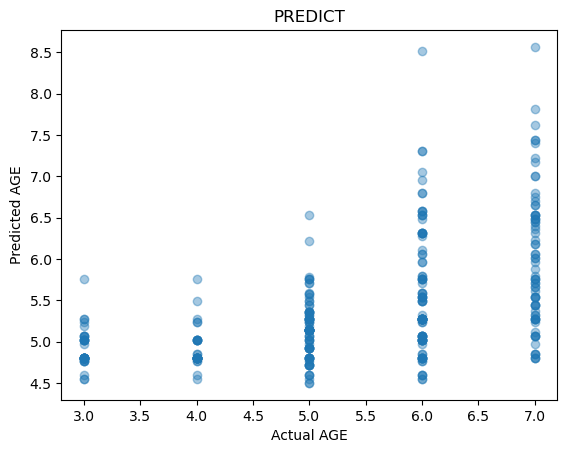

0.2623474609157487
0.2709211876926598


In [74]:
#데이터 셋 분리하기
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x=data[["형태소","단어"]]
y=data[["나이"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
lg = LinearRegression()
lg.fit(x_train, y_train)
y_train_pred = lg.predict(x_train)
y_predict = lg.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual AGE")
plt.ylabel("Predicted AGE")
plt.title("PREDICT")
plt.show()
print(lg.score(x_train,y_train))
print(lg.score(x_test, y_test))




## 시각화

In [69]:
# import matplotlib.pyplot as plt
#
# df = data.pivot('형태소', '단어', '나이')
# print(df)
# plt.pcolor(df)

ValueError: Index contains duplicate entries, cannot reshape

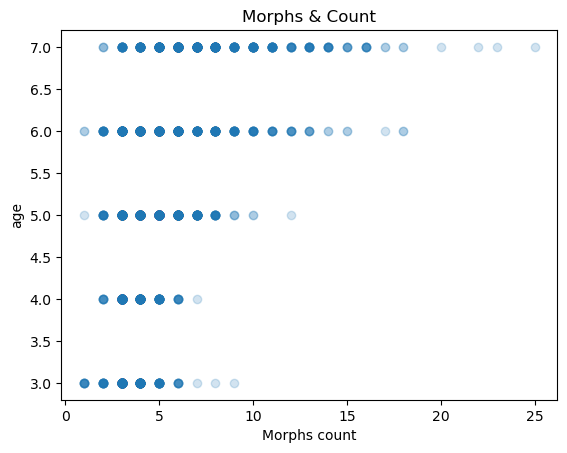

In [70]:
import matplotlib.pyplot as plt

plt.scatter(data["형태소"], data["나이"], alpha=0.2)
plt.xlabel('Morphs count')
plt.ylabel('age')
plt.title("Morphs & Count")
plt.show()

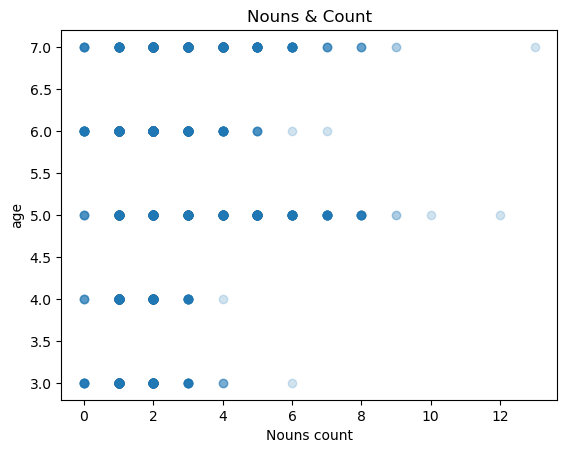

In [71]:
plt.scatter(data["단어"], data["나이"], alpha=0.2)
plt.xlabel('Nouns count')
plt.ylabel('age')
plt.title("Nouns & Count")
plt.show()